# Research Question
Our research question is how many goals FC Barcelona is going to score in a certain match providing its date, opponent team, whether it is a home or an away match.

# Motivation
We chose FC Barcelona because it is a team known for its attacking capabilities and scoring many goals so this will gave us more space to explore. Also FC Barcelona is a team loved by billions aroung the world so many people would be interested in this topic including us. 

# Questions analysed through the project
We first need to analyze the data that is directly related to our research question. The <strong>total number of goals</strong> scored by FC Barcelona, the <strong>number of matches</strong> played, the <strong>mean</strong> and the <strong>standard deviation</strong> of the number of goals scored is represented in a <strong>table</strong> for visualization.

The second thing we need to do is to check whether the attributes we picked actually affect the number of goals scored by FC Barcelona. Starting with the <strong>date</strong> attribute, <strong>2 histograms</strong> was used to visualize the average number of goals scored in each year and the total number of goals scored in each year. Next attribute is the <strong>home/away</strong> attribute, <strong>2 histogram</strong> was used to visualize the average number of goals in total home/away matches and the total number of goals scored in total home/away matches. Next attribute is the <strong>opponent team</strong> attribute. 3 <strong>histograms</strong> were used to visualize the average number of goals, min number of goals and max number of goals scored in each opponent team.

# Dataset used
Please download this dataset https://www.kaggle.com/hugomathien/soccer and name it database.sqlite


# Current Form Of Data
The data is currently in the following form (The attributes we are interested in): date, home_team_api_id, away_team_api_id, home_team_goal and away_team_goal. Here is a visual example representation:

| date                | home_team_api_id | away_team_api_id | home_team_goal | away_team_goal |
| :-------------------| :--------------: | :--------------: | :------------: | :------------: |
| 2008-08-17 00:00:00 | 9987             | 9993             | 0              | 1              |
| 2015-09-23 00:00:00 | 10192            | 9931             | 4              | 3              |

where <strong>date</strong> is the date when the match was played  
<strong>home_team_api_id</strong> is the team id of the home team. The team_id can be found in the used dataset  
<strong>away_team_api_id</strong> is the team id of the away team. The team_id can be found in the used dataset  
<strong>home_team_goal</strong> is the number of goals scored by the home team in this match  
<strong>away_team_goal</strong> is the number of goals scored by the away team in this match  


# Desired Form Of Data
The desired form of data should be in the following form: date, opponent team id, barca goals and whether or it is a home or an away match. Here is a visual representation of how the data should look like:

| date      | opponent_team_id | barca_goals | home_away |
| :---------| :--------------: | :---------: | --------: |

where <strong>date</strong> is the desired year minus the min year in the data set  
<strong>opponent_team_id</strong> is the team id of the opponent team. The team_id can be found in the used dataset  
<strong>barca_goals</strong> is the number of goals scored by FC Barcelona in this match  
<strong>home_away</strong> is whether it is a home or an away match where home represents 1 and away represents 0

Here is an example of how the data could be represented

| date      | opponent_team_id (One Hot Encoded) | barca_goals | home_away |
| :---------| :--------------------------------: | :---------: | --------: |
| 0         | (0 or 1 based on one hot encoding) | 6           | 0         |
| 8         | (0 or 1 based on one hot encoding) | 3           | 1         |

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3

database = sqlite3.connect("database.sqlite");

# Get FC Barcelona's team_api_id
In order to get the matches where FC Barcelona was involved in we need its team_api_id.  
The table which is named <strong>team</strong> is the table we are going to use to get the team_api_id. Here is a visual example representation (Only the attributes we are interested in):

| team_api_id | team_long_name |
| :---------- | -------------: |
| 8634        | FC Barcelona   |

What we are going to do is we are going to select the teams where their team_long_name is FC Barcelona (Only FC Barcelona will be returned) then we are going to get its team_api_id


In [8]:
# Get the team_api_id of FC Barcelona
barca_df = pd.read_sql_query("SELECT * from team where team_long_name='FC Barcelona'", database)
barca_api_id = barca_df.team_api_id[0]

barca_api_id

8634

# Select only the attributes related to our research problem

We are going to reach the desired form of data by getting the home and away matches alone and then concatenating them at the end.

For the home matches we are going to get the <strong>date</strong>, <strong>away_team_api_id</strong> (which represents the opponent team so we are going to rename it as opponnent_team_id) and <strong>home_team_goal</strong> (which represents the number of goals FC Barcelona scored in the match so we are going to rename it as barca_goals).

For the away matches we are going to get the <strong>date</strong>, <strong>home_team_api_id</strong> (which represents the opponent team so we are going to rename it as opponnent_team_id) and <strong>away_team_goal</strong> (which represents the number of goals FC Barcelona scored in the match so we are going to rename it as barca_goals).

Using the where clause in SQL and barca_api_id we can get the home and away matches for FC Barcelona by searching the home_team_api_id and away_team_api_id.

In [9]:
## Select only the attributee relevant to our research question

# Concerning the matches where FC Barcelona was the home team, we need the date, and the away team (opponent)
# and the number of goals the home team (FC Barcelona) scored
home_select_clause = "date, away_team_api_id as 'opponent_team_id', home_team_goal as 'barca_goals'"

# Concerning the matches where FC Barcelona was the away team, we need the date, and the home team (opponent)
# and the number of goals the away team (FC Barcelona) scored
away_select_clause = "date, home_team_api_id as 'opponent_team_id', away_team_goal as 'barca_goals'"

# Select only the matches that FC Barcelona involved in as the home team and the away team seperately
home_where_clause = "home_team_api_id=" + str(barca_api_id)
away_where_clause = "away_team_api_id=" + str(barca_api_id)

# Putting things together

Using the <strong>SELECT</strong> and <strong>WHERE</strong> clauses we can obtain the home and away matches 

In [10]:
# return the home matches of FC Barcelona
home_matches_df = pd.read_sql_query("SELECT " + str(home_select_clause) +" from match where " + str(home_where_clause), database)
home_matches_df.head()

,date,opponent_team_id,barca_goals
0,2008-11-08 00:00:00,10281,6
1,2008-11-23 00:00:00,8305,1
2,2008-12-06 00:00:00,10267,4
3,2008-12-13 00:00:00,8633,2
4,2009-01-03 00:00:00,8661,3


In [11]:
# return the home matches of FC Barcelona
away_matches_df = pd.read_sql_query("SELECT " + str(away_select_clause) +" from match where " + str(away_where_clause), database)
away_matches_df.head()

,date,opponent_team_id,barca_goals
0,2008-08-31 00:00:00,8388,0
1,2008-11-16 00:00:00,8479,2
2,2008-11-29 00:00:00,8302,3
3,2008-12-21 00:00:00,10205,2
4,2009-01-11 00:00:00,8371,3


# Set the home_away attribute
Set the home_away attribute for the home and away dataframes where the home dataframe gets a value of 1 and the away dataframe gets a value of 0

In [12]:
# Create a new attribute named home_away where 0 is home and 1 is away and apply it on our two data frames
home_matches_df['home_away'] = 1
home_matches_df.head()

,date,opponent_team_id,barca_goals,home_away
0,2008-11-08 00:00:00,10281,6,1
1,2008-11-23 00:00:00,8305,1,1
2,2008-12-06 00:00:00,10267,4,1
3,2008-12-13 00:00:00,8633,2,1
4,2009-01-03 00:00:00,8661,3,1


In [13]:
away_matches_df['home_away'] = 0
away_matches_df.head()

,date,opponent_team_id,barca_goals,home_away
0,2008-08-31 00:00:00,8388,0,0
1,2008-11-16 00:00:00,8479,2,0
2,2008-11-29 00:00:00,8302,3,0
3,2008-12-21 00:00:00,10205,2,0
4,2009-01-11 00:00:00,8371,3,0


# Get minimum year in the dataset

In order to reach the desired form of data we need to get the minimum year in the dataset so that we can use it to manipulate the date attribute as described above. We are going to do that by returning all the dates from the dataset. We will then manipulate the it by getting the year only from date attribute. The date attribute is in the following form yyyy-mm-dd hh:mm:ss so we are going to extract the year by getting the first integer in the date attribute which is the yyyy. Then we are going to convert the string to a float and then to an integer. After we obtain the years in an integer form we can then get the minimum year.

In [14]:
# Get all the dates from the database
date_df = pd.read_sql_query("SELECT date from match", database)
date_df.head()

,date
0,2008-08-17 00:00:00
1,2008-08-16 00:00:00
2,2008-08-16 00:00:00
3,2008-08-17 00:00:00
4,2008-08-16 00:00:00


In [15]:
# Extracting the year from the date attribute
date_df["date"] = date_df["date"].str.extract('(\d+)', expand=False).astype(float).astype(int)
date_df.head()

,date
0,2008
1,2008
2,2008
3,2008
4,2008


In [16]:
# Obtaining the min year
min_year = date_df["date"].min()
min_year

2008

# Manipulate date attribute

After obtaining the min year, we can use it to manipulate the date attribute by subtracting every year by the min year obtained

In [17]:
# maniuplate the date attribute
home_matches_df["date"] = home_matches_df["date"].str.extract('(\d+)', expand=False).astype(float).astype(int) - min_year
away_matches_df["date"] = away_matches_df["date"].str.extract('(\d+)', expand=False).astype(float).astype(int) - min_year

home_matches_df.head()

,date,opponent_team_id,barca_goals,home_away
0,0,10281,6,1
1,0,8305,1,1
2,0,10267,4,1
3,0,8633,2,1
4,1,8661,3,1


# Concatenate home and away matches

In [18]:
# Concatenate home and away matches
all_matches_df = pd.concat([home_matches_df, away_matches_df])

all_matches_df.head()

,date,opponent_team_id,barca_goals,home_away
0,0,10281,6,1
1,0,8305,1,1
2,0,10267,4,1
3,0,8633,2,1
4,1,8661,3,1


# We have to make sure there are no null values

Luckily, there are not any missing values in our dataset.

In [19]:
print(all_matches_df.isnull().sum());

date                0
opponent_team_id    0
barca_goals         0
home_away           0
dtype: int64


# One hot encoding for Opponent team ids.

The fact that teams ids are presented using numbers can give the machine learning model a false indication of a correlation between the number's value and the prediction. Therefore, it's safer to one hot encode.

Find below an encoded version of the opponent team id

In [20]:
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
import re

# initialize the one hot encoder
one_hot_encoder = OneHotCategoricalEncoder()

# get the opponent_team_id column from the all matches data frame
categorical_columns_df = all_matches_df.copy()[['opponent_team_id']]

# fit and transform the one hot encoder to the opponent team data
encoded_categorical_columns_df = one_hot_encoder.fit_transform(categorical_columns_df.astype(str))

encoded_categorical_columns_df.head()

,opponent_team_id_10281,opponent_team_id_8305,opponent_team_id_10267,opponent_team_id_8633,opponent_team_id_8661,opponent_team_id_9783,opponent_team_id_8696,opponent_team_id_8388,opponent_team_id_9869,opponent_team_id_8558,...,opponent_team_id_8560,opponent_team_id_8581,opponent_team_id_10278,opponent_team_id_8370,opponent_team_id_7878,opponent_team_id_9910,opponent_team_id_10268,opponent_team_id_7869,opponent_team_id_8372,opponent_team_id_8306
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Concatenating encoded attribute to data frame

In [21]:
# remove the old attribute since it will not be used
all_matches_no_opponent_df = all_matches_df.drop(['opponent_team_id'], axis=1)

# add the encoded attribute
all_matches_encoded_df = pd.concat([all_matches_no_opponent_df, encoded_categorical_columns_df], axis = 1)
all_matches_encoded_df.head()

,date,barca_goals,home_away,opponent_team_id_10281,opponent_team_id_8305,opponent_team_id_10267,opponent_team_id_8633,opponent_team_id_8661,opponent_team_id_9783,opponent_team_id_8696,...,opponent_team_id_8560,opponent_team_id_8581,opponent_team_id_10278,opponent_team_id_8370,opponent_team_id_7878,opponent_team_id_9910,opponent_team_id_10268,opponent_team_id_7869,opponent_team_id_8372,opponent_team_id_8306
0,0,6,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,4,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,3,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Table Visualization
We need to create a method to be used whenever we want to create a table for visualization

In [22]:
class DictTable(dict):
    # Overridden dict class which takes a dict in the form {'a': 2, 'b': 3},
    # and renders an HTML Table in IPython Notebook.
    def _repr_html_(self):
        html = ["<table>"]
        for key, value in self.items():
            html.append("<tr>")
            html.append("<td>{0}</td>".format(key))
            html.append("<td>{0}</td>".format(value))
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)


# Table for goals scored by FC Barcelona
We used to a table to visualize how many goals FC Barcelona score and the total number of matches played. Also the mean and the standard deviation of the number of goals scored is recorded in the table. 

In [23]:
DictTable({'total_goals': all_matches_encoded_df['barca_goals'].sum(),
           'total_matches_played': all_matches_encoded_df['barca_goals'].count(),
           'mean': all_matches_encoded_df['barca_goals'].mean(),
           'std': all_matches_encoded_df['barca_goals'].std()})

total_goals,849
total_matches_played,304
mean,2.7927631578947367
std,1.75565477611506


# Analysis on results
As we can see FC Barcelona scored 849 goals in 304 matches played with a mean of almost 3 goals per match. 3 goals per match is a very high number. usually a team scores an average of 1 or 2 goals per match. That shows that FC Barcelona attacks very good and as a result scores many goals. Also the standard deviation is high which is 1.7 and that is because FC Barcelona scored 4-8 goals multiple of times which affected the standard deviation which confirms that FC Barcelona scores many goals.

# Histograms for date attribute
Two histograms were created to visualize the total number of goals scored in each year and the average number of goals scored in each year.

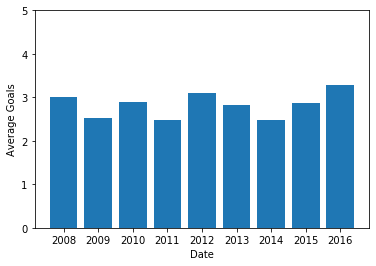

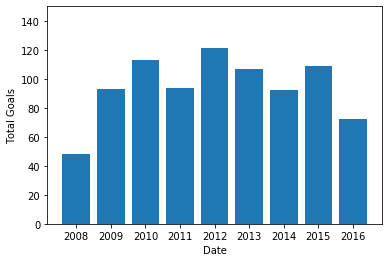

In [24]:
# total goals scored in each year
goals_scored_per_date = all_matches_encoded_df.groupby(['date']).sum()['barca_goals']
# total number of matches played in each year
matches_played_per_date = all_matches_encoded_df.groupby(['date']).count()['barca_goals']
# Average number of goals scored in each year
avr_date_goals = goals_scored_per_date/matches_played_per_date

# Plot the average number of goals scored in each year
dict_date_avr = {}

avr_date_goals.head()
for index, row in avr_date_goals.iteritems():
    dict_date_avr.update({(index+min_year): row})

plt.bar(range(len(dict_date_avr)), list(dict_date_avr.values()), align='center')
plt.xticks(range(len(dict_date_avr)), list(dict_date_avr.keys()))
axes = plt.gca()
axes.set_ylim([0,5])

plt.xlabel("Date")
plt.ylabel("Average Goals")
plt.show()
    
# Plot the total number of goals scored in each year
dict_date_total_goals = {}
for index, row in goals_scored_per_date.iteritems():
    dict_date_total_goals.update({(index+min_year): row})


plt.bar(range(len(dict_date_total_goals)), list(dict_date_total_goals.values()), align='center')
plt.xticks(range(len(dict_date_total_goals)), list(dict_date_total_goals.keys()))
axes = plt.gca()
axes.set_ylim([0,150])

plt.xlabel("Date")
plt.ylabel("Total Goals")
plt.show()

# Analysis on results
The histograms shows that the date attribute affects the number of goals scored by FC Barcelona. That makes sense because the team as a whole could be good in one year but its performance drops in the next year and that is actually the case most of the times. As we can see, it is very hard for a football club to stay at the top for two consecutive years, its performance probably drops the following year.

The date attribute will help the machine learning algorithm because it will notice some pattern in the date and predict accordingly. Also the date will probably be used along with the opponent team in order to get some sense of whether this team is strong or not. For example, the machine learning algorithm can notice that even though FC Barcelona did not score alot of goals in a certain year but it still managed to score alot of goals against a specific team then this means that this team is probably weak and will later on predict more goals against this team

# Hisotgrams for home/away attribute
Two histograms were created to visualize the total number of goals scored and the average number of goals scored in home and away goals seperately.

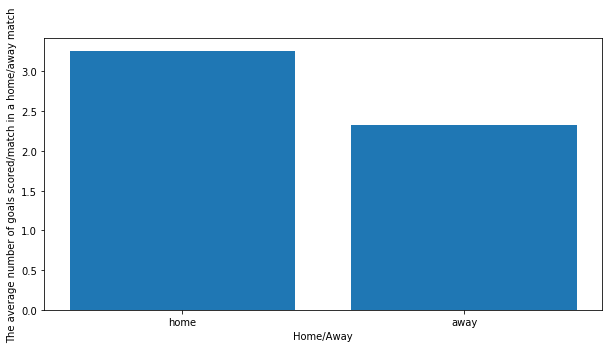

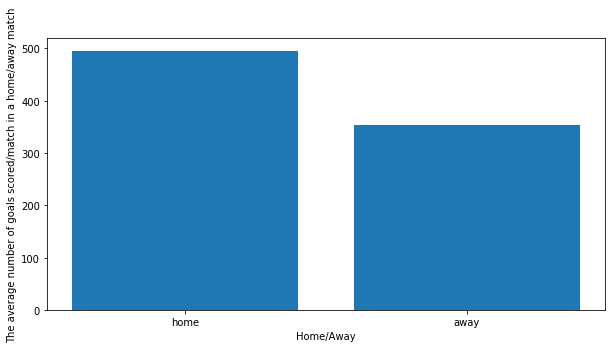

In [25]:
# Plotting the average number of goals scored in the home and away matches

dict_home_away_avr = {'home': home_matches_df['barca_goals'].mean(), 
                     'away': away_matches_df['barca_goals'].mean() }

plt.figure(figsize=(10, 5))

plt.bar(range(len(dict_home_away_avr)), list(dict_home_away_avr.values()), align='center')
plt.xticks(range(len(dict_home_away_avr)), list(dict_home_away_avr.keys()))
axes = plt.gca()

plt.xlabel("Home/Away")
plt.ylabel("The average number of goals scored/match in a home/away match")
plt.show()


dict_home_away_sum = {'home': home_matches_df['barca_goals'].sum(), 
                     'away': away_matches_df['barca_goals'].sum() }

# Plotting the total number of goals scored in the home and away matches
plt.figure(figsize=(10, 5))

plt.bar(range(len(dict_home_away_sum)), list(dict_home_away_sum.values()), align='center')
plt.xticks(range(len(dict_home_away_sum)), list(dict_home_away_sum.keys()))
axes = plt.gca()

plt.xlabel("Home/Away")
plt.ylabel("The average number of goals scored/match in a home/away match")
plt.show()

# Analysis On Results
The results showed that the whether the match is played home or away affects <strong>ALOT</strong> the number of goals scored by FC Barcelona. That makes alot of sense because when a football club plays in its own stadium and with all the crowd supporting it, it will definetly perform better.

This is will help the machine learning algorithm alot because it will predict more goals when it is a home match than an away match.

# Histograms for opponent attribute
3 histograms were used to visualize the average, minimum and maximum number of goals scored in each opponent

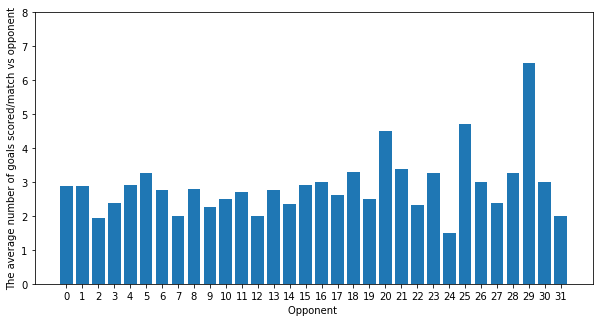

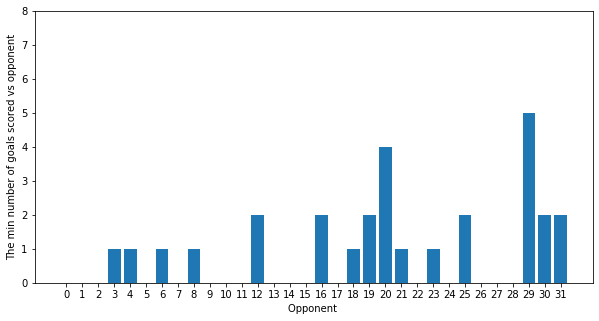

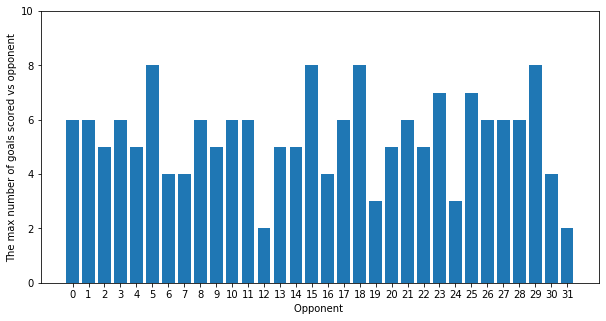

In [26]:
dict_opponent_avr_goals = {}
dict_opponent_min_goals = {}
dict_opponent_max_goals = {}

team_index = 0

#Calculate min, max and average number of goals scored in one for loop
for column in encoded_categorical_columns_df.columns :
    if(re.match("opponent.*", column)):
        
        goals = 0
        matches = 0
        min_goals = 10
        max_goals = 0
        for index, row in all_matches_encoded_df.iterrows():
            if(row[column] != 1):
                continue
            
            goals_scored = row['barca_goals']
            goals = goals + goals_scored
            matches = matches+1
            if(goals_scored < min_goals):
                min_goals = goals_scored
            if(goals_scored > max_goals):
                max_goals = goals_scored
        
        dict_opponent_avr_goals.update({team_index: (goals/matches)})
        dict_opponent_min_goals.update({team_index: min_goals})
        dict_opponent_max_goals.update({team_index: max_goals})
   
        team_index = team_index + 1

# Average goals scored vs opponent
plt.figure(figsize=(10, 5))

plt.bar(range(len(dict_opponent_avr_goals)), list(dict_opponent_avr_goals.values()), align='center')
plt.xticks(range(len(dict_opponent_avr_goals)), list(dict_opponent_avr_goals.keys()))
axes = plt.gca()
axes.set_ylim([0,8])

plt.xlabel("Opponent ")
plt.ylabel("The average number of goals scored/match vs opponent")
plt.show()

# Min goals scored vs opponent
plt.figure(figsize=(10, 5))

plt.bar(range(len(dict_opponent_min_goals)), list(dict_opponent_min_goals.values()), align='center')
plt.xticks(range(len(dict_opponent_min_goals)), list(dict_opponent_min_goals.keys()))
axes = plt.gca()
axes.set_ylim([0,8])

plt.xlabel("Opponent ")
plt.ylabel("The min number of goals scored vs opponent")
plt.show()

# Max goals scored vs opponent
plt.figure(figsize=(10, 5))

plt.bar(range(len(dict_opponent_max_goals)), list(dict_opponent_max_goals.values()), align='center')
plt.xticks(range(len(dict_opponent_max_goals)), list(dict_opponent_max_goals.keys()))
axes = plt.gca()
axes.set_ylim([0,10])

plt.xlabel("Opponent ")
plt.ylabel("The max number of goals scored vs opponent")
plt.show()

# Analysis On Results
As we can see from the histograms the opponent team affects the number of goals scored by FC Barcelona. That makes sense because there are weak teams and strong teams and it makes sense that FC Barcelona score more goals against weak teams than strong teams. That is reflected in the first histogram. Also the other two histograms shows that there are teams that FC Barcelona always score against (These are the teams that have a minimum of 1 goal or more). There are also teams that FC Barcelona scored against 6 goals or more which is showed by the histogram representing the maximum number of goals scored. We will notice that FC Barcelona scored 6 or more goals against 17 out of 31 teams which is more than half and that is a <strong>VERY</strong> large number. 

# Machine Learning Algorithm
In order to put all the data analysis and cleaning in use, we implemented a machine learning algorithm that uses the attributes mentioned and analysed. 

First we need to create a training set and a test set for the dataset

In [27]:
from sklearn.model_selection import train_test_split

# First split data into X (inputs) and Y (outputs)
X1 = all_matches_encoded_df.drop(["barca_goals"], axis = 1)

# The output
y1 = all_matches_encoded_df["barca_goals"]

# splitting  dataset
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1,y1,stratify=y1,train_size=0.8,test_size=0.2,random_state = 0)

# Now we try the linear regression model

In [28]:
from sklearn.linear_model import LinearRegression

LR1 = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
LR1.fit(X_train_1, y_train_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
# Get predictions and approximate values

predictions_1 = LR1.predict(X_test_1)

# approximate values for each prediction set
for i in range(predictions_1.size) :
    prediction = predictions_1[i]
    
    if(prediction < 0):
        predictions_1[i] = 0
        continue
    if(prediction > 8):
        predictions_1[i] = 8
        continue
        
    decimal = prediction % 1
    
    if(decimal >= 0.5):
        predictions_1[i] = prediction + 1 - decimal
    else :
        predictions_1[i] -= decimal   

# Accuracy when considered correct if the number of goals is within the range of correct answer +1 and correct answer -1
accuracy_1 = sum(np.absolute(predictions_1 - y_test_1) <= 1) / y_test_1.size

print("Predictions when considered correct if the number of goals is within the range of correct answer +1 and correct answer -1")
print("Linear Regression accuracy : " + str(accuracy_1))

print("\n")

# Predictions when considered correct if the number of goals is exactly the correct answer
accuracy_1 = sum((predictions_1 - y_test_1) == 0) / y_test_1.size
print("Predictions when considered correct if the number of goals is exactly the correct answer")
print("Linear Regression accuracy : " + str(accuracy_1))

Predictions when considered correct if the number of goals is within the range of correct answer +1 and correct answer -1
Linear Regression accuracy : 0.4918032786885246


Predictions when considered correct if the number of goals is exactly the correct answer
Linear Regression accuracy : 0.22950819672131148


# Final Analysis
As shown in the data analysis that each attribute we discussed contibutes and affects the number of goals scored by FC Barcelona. These attribute are the date(year), whether the match is home or away and the opponent team.

Our machine learning algorithm got some good results putting in consideration that it is very hard to predict the number of goals a team will score in a match especially when this team is FC Barcelona. Also we used a very simple linear regression model to predict the number of goals scored. We did not put alot of effort in the machine learning algorith because it is not the core of the course. 

We still got some good results which is approximately 23% to get the exact number of goals correctly and it got approximately 50% when the error margin is 1. 

These results can be improved if we added some player information. For example, we can add to the data who scores the goals and whether he is playing or not. That will help the machine learning algorithm to predict the number of goals scored depending on the players playing.
